# EE4371 - DSA - Assignment-3 - CH18B035 - Gunavardhan

## Q1. Show that the running time of the merge-sort algorithm on n-element sequence is O(n log n), even when n is not a power of 2.

<b>Aim</b> : To prove time complexity of merge sort is O(nlogn)<br>
<b>Approach</b> : Finding comlplexity of each step(divide and conquer steps) in the pseudo code of merge sort

Merge sort follows divide and conquer approach meaning key idea is : 
- Break problem into smaller subproblems
- Solve the subproblems recursively
- Combine the solutions of the subproblems

<b>Lets look at the pseudo code :</b>

MERGE(L, R):

    result = length n array
    i = 0, j = 0
    for k in [0,...,n-1]
        if L[i] < R[j]:
            result[k] = L[i]
            i += 1
        else:
            result[k] = R[j]
            j += 1
     
     return result

MERGESORT(A):

    n = len(A)
    if n <= 1:
        return A
        
    L = MERGESORT(A[0:n/2])
    R = MERGESORT(A[n/2:n])
    
    return MERGE(L, R)
    
    
Based on the pseudo code there, using the idea of divide and conquer :
- we are dividing the given array into two halfs 
- then solving the two halfs (sorting them separately)
- Lastly we combine the solution i.e., we merge both the halfs

<b>Mathematical Proof : </b><br>
Lets assume to solve an n length array we need T(n) time, then <br>
Solving two subproblems of length n/2 take T(n/2) time each <br>
Lastly merge step takes single pass through entire array, hence cn time implies <br>
- T(n) = T(n/2) + T(n/2) + cn
- T(n) = 2T(n/2) + cn

Base condition to solve an array of size 1 takes constant time(no need to sort single element), no expanding 
- T(n) = 2(2T(n/4) + cn/2) + cn
- T(n) = 2*2*T(n/4) + cn + 2*cn/2
.
.
.(keep on expanding till we get T(1) will result in sum of a geometric series)
- T(n) = 2<sup>logn</sup> + cn + 2*cn/2 + 2*2*cn/(2*2) ... (logn terms)
- T(n) = 2<sup>logn</sup> + cn + cn + cn ... (logn terms)
- T(n) = 2<sup>logn</sup> + cn*logn

In terms of O(n) this implies time complexity is O(constant + cnlogn) ~ O(nlogn)

<b>Theoretical Proof : </b><br>
Think of this as 3 steps : 

    1)The divide step computes the midpoint of each of the sub-arrays. Each of this step just takes O(1) time.
    2)The conquer step recursively sorts two subarrays of n/2 (for even n) elements each.
    3)The merge step merges n elements which takes O(n) time.
Now, for steps 1 and 3 i.e. between O(1) and O(n), O(n) is higher. Let's consider steps 1 and 3 take O(n) time in total. Say it is cn for some constant c.

How many times are these steps executed?

For this, look at the tree below - for each level from top to bottom Level 2 calls merge method on 2 sub-arrays of length n/2 each. The complexity here is 2 * (cn/2) = cn Level 3 calls merge method on 4 sub-arrays of length n/4 each. The complexity here is 4 * (cn/4) = cn and so on ...

Now, the height of this tree is (logn + 1) for a given n. Thus the overall complexity is (logn + 1)*(cn). That is O(nlogn) for the merge sort algorithm.

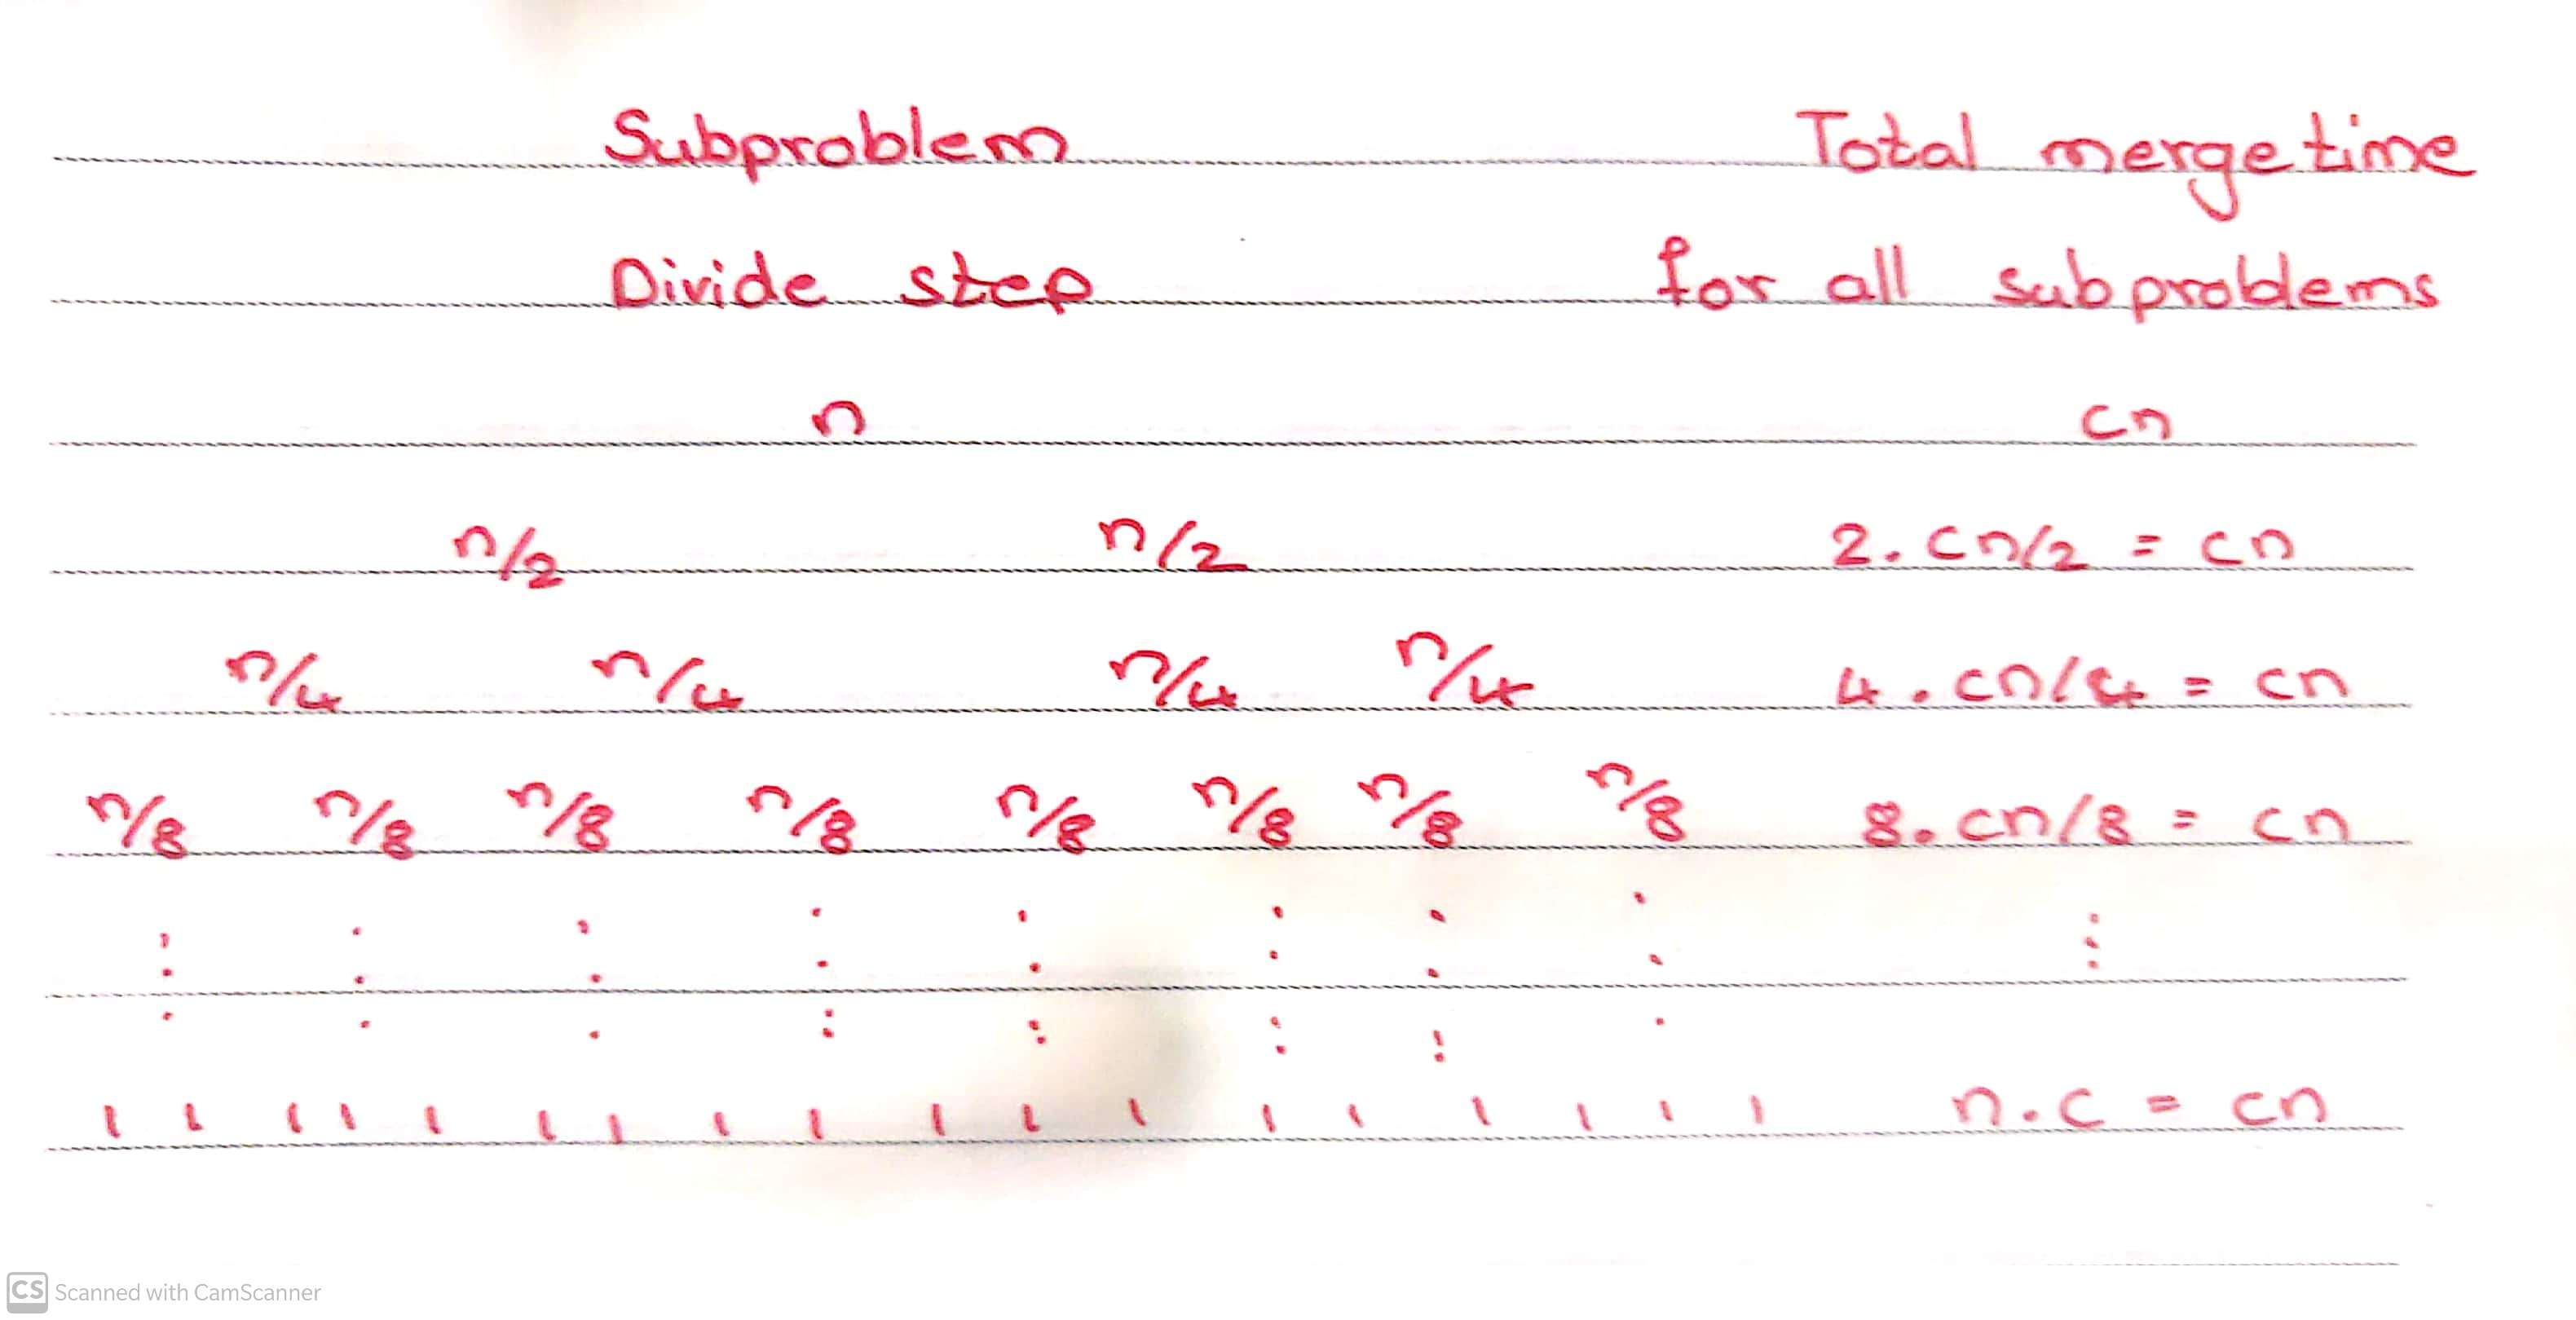

In [12]:
#Implementation for use in Q3

def merge(arr, l, m, r): 
    n1 = m - l + 1
    n2 = r- m 
  
    # create temp arrays 
    L = [0] * (n1) 
    R = [0] * (n2) 
  
    # Copy data to temp arrays L[] and R[] 
    for i in range(0 , n1): 
        L[i] = arr[l + i] 
  
    for j in range(0 , n2): 
        R[j] = arr[m + 1 + j] 
  
    # Merge the temp arrays back into arr[l..r] 
    i = 0    
    j = 0  
    k = l   
  
    while i < n1 and j < n2 : 
        if L[i] <= R[j]: 
            arr[k] = L[i] 
            i += 1
        else: 
            arr[k] = R[j] 
            j += 1
        k += 1
  
    # Copy the remaining elements of L[], if there 
    # are any 
    while i < n1: 
        arr[k] = L[i] 
        i += 1
        k += 1
  
    # Copy the remaining elements of R[], if there 
    # are any 
    while j < n2: 
        arr[k] = R[j] 
        j += 1
        k += 1
  
#
# l is for left index and r is right index of the 
# sub-array of arr to be sorted 
def mergeSort(arr,l,r): 
    if l < r: 
  
        # Same as (l+r)//2, but avoids overflow for 
        # large l and h 
        m = (l+(r-1))//2
  
        # Sort first and second halves 
        mergeSort(arr, l, m) 
        mergeSort(arr, m+1, r) 
        merge(arr, l, m, r) 

## Q2.Consider a modification of the deterministic version of the quick-sort algorithm where we choose the element at index ⌊n/2⌋ as our pivot. Describe the kind of sequence that would cause this version of quick-sort to run in Ω(n<sup>2</sup>) time.

<b>Aim : </b>To find the kinda sequence which result in worst case time complexity for given condition in quick sort.<br>
<b>Approach :</b> From the general approach finding the situation when worst case happens and relating to the the given condition.

Similar to mergesort, quick sort follows divide and conquer approach :
- Break problem into smaller subproblems
- Solve the subproblems recursively
- Combine the solutions of the subproblems

Basic idea is to select a random pivot, partition the array and then sort the left and right parts recursively

<b>Lets look at the Pseudo Code:</b>

QUICKSORT(A):

    if len(A) <= 1:
        return A
    pivot = random.choice(A)
    PARTITION A into:
        L(less than pivot and)
        R(greater than pivot)
    Replace A with [L, pivot, R]
    
    QUICKSORT(L)
    QUICKSORT(R)
    
Now lets assume the time complexity for the given sequence of length n is T(n) :<br>
Then recurrence relation for quicksort can be wrritten as <br>
T(n) = T(|L|) + T(|R|) + O(n)  (where base conditions are T(0) = T(1) = O(1) single/no element)

In an ideal world pivot divides the array into exactly two equal halfs, then |L|=|R|~n/2 which makes the relation as T(n) = 2*T(n/2) + O(n) implies same as merge sort, hence O(n*logn) complexity.(Proof in 5th Question solution)

But in worst case scenario the pivot could not divide the array instead |L| or |R| = 0 and |L| or |R| = n-1, implies time complexity will be<br>
T(n) = T(n-1) + O(n) <br>
If this repeats for all the subproblems then on expansion<br>
T(n) = T(1) + O(n+(n-1)+(n-2)+....+1)<br>
T(n) = constant + O(n(n+1)/2)<br>
T(n) ~ O(n<sup>2</sup>)

Now we know worst case happens when the array is not divided, this means the selected element is a minima or maxia of the array always, <br>
Hence each step we have to compare rest of all the elements to decide the correct position.

<b>The sequence whose pivot always remains the max or min of the sub array, are the sorted sequences rotated clockwise or anticlockwise by ⌊n/2⌋ or ⌊n/2⌋-1, given the deterministic condition in the question</b>
    
Example 1 : Lets take sorted sequence (1, 2, 3, 4, 5, 6) rotated by 3 gives A(4, 5, 6, 1, 2, 3)
Lets do quick sort step by step :

Step 1: pivot is ⌊6/2⌋ = 3, A[3] = 6, L = (4, 5, 1, 2, 3) and R = () --- A(4, 5, 1, 2, 3, 6)---Comparisons = 5

Step 2: pivot is ⌊5/2⌋ = 2, A[2] = 5, L = (4, 1, 2, 3) and R = () ------ A(4, 1, 2, 3, 5, 6)---Comparisons = 4

Step 3: pivot is ⌊4/2⌋ = 2, A[2] = 1, L = () and R = (4, 2, 3) --------- A(1, 4, 2, 3, 5, 6)---Comparisons = 3

Step 4: pivot is ⌊3/2⌋ = 1, A[2] = 4, L = (2, 3) and R = () ------------ A(1, 2, 3, 4, 5, 6)---Comparisons = 2

Step 5: pivot is ⌊2/2⌋ = 1, A[2] = 2, L = () and R = (3) --------------- A(1, 2, 3, 4, 5, 6)---Comparisons = 1

Here we noticed that at each step either L or R is null and pivot was always min or max of the subproblem and comparisons required are the order of n<sup>2</sup> here n is 6 hence took 5*6/2 ~ 15 comparisions

Example 2 : Lets take sorted sequence (5, 6, 7, 8, 9) rotated by 2-1 = 1 gives A(9, 5, 6, 7, 8)
Lets do quick sort step by step :

Step 1: pivot is ⌊5/2⌋ = 2, A[2] = 5, L = () and R = (9, 6, 7, 8) --- A(5, 9, 6, 7, 8)---Comparisons = 4

Step 2: pivot is ⌊4/2⌋ = 2, A[2] = 6, L = () and R = (9, 7, 8) ------ A(5, 6, 9, 7, 8)---Comparisons = 3

Step 3: pivot is ⌊3/2⌋ = 1, A[1] = 9, L = (7, 8) and R = () --------- A(5, 6, 7, 8, 9)---Comparisons = 2

Step 4: pivot is ⌊2/2⌋ = 1, A[1] = 7, L = () and R = (8) ------------ A(5, 6, 7, 8, 9)---Comparisons = 1

Here we noticed that at each step either L or R is null and pivot was always min or max of the subproblem and comparisons required are the order of n<sup>2</sup> here n is 5 hence took 4*5/2 ~ 10 comparisions


<b>Note as discussed in class we are using inplace sorting, that is order is not changed when partitioned</b>

## Q3.Describe and analyze an efficient method for removing all duplicates from a collection A of n elements.

<b>Aim</b> : To remove duplicates from the array in efficient manner.

<b>Assumptions</b> : Given array has duplicate elements, order need not be preserved
    
<b>Que</b> : Easy way to find duplicates is when an array is sorted, after which single pass gives the duplicates

<b>Algorithm Deascription : <br>
Approach 1 : combination of merge sort and single pass throught the array</b>

Step 1 : 

(O(nlogn)) Sort the array using the merge sort described above.

Step 2 :

(O(n)) Since the array is sorted, we can keep two pointers i and j, where i is the slow-runner while j is the fast-runner. 
    
    Case 1 : As long as nums[i]=nums[j], we increment j to skip the duplicate.

    Case 2 : When we encounter nums[j]≠nums[i], the duplicate run has ended so we must copy its value to nums[i+1]. i is then incremented and we repeat the same process again until j reaches the end of array

Timecomplexity : O(nlog(n) + n) ~ O(nlogn)

<b> Implementation </b>

In [4]:
def remove_duplicates(arr):
    
    #step 1 : as described sort the array using mergesort
    mergeSort(arr, 0, len(arr)-1)
    
    #step 2 : checking for duplicates in single pass of array
    i = 0
    j = 1
    while j < len(arr):
        
        #case 2 : not equal implies we must copy j value to i+1 value index
        if arr[j] != arr[i]:
            i += 1
            arr[i] = arr[j]
        j += 1
        # each step array till i+1 is duplicates free
    
    return arr[:i+1]
    
# sample example for checking correctness
nums = [1, 1, 2, 3, 4, 5, 6, 5, 3, 2]
print(remove_duplicates(nums))
# Output : [1, 2, 3, 4, 5, 6]

[1, 2, 3, 4, 5, 6]


<b>Approach 2: Tweaking quick sort, based on the knowledge we know about it</b>

As decribed in previous question, pseudo code and working of quick sort algorithm, we know that, in a sense it is based on comparions between elments.

This can be used to our advantage, all we need to do is while comparing if found equal, we delete that element then and there it self and procced.

Though this wont reduce the complixety as all we did compare to previous case where we neglected elements after sorting, here we are neglecting while sorting the array, hence at average time complexity still remains same that is O(n*logn)

<b>Hence pseudo code can be changed to</b>

QUICKSORT(A):

    if len(A) <= 1:
        return A
    pivot = random.choice(A)
    PARTITION A into:
        L( STRICTLY less than pivot and)
        R( STRICTLY greater than pivot)
    Replace A with [L, pivot, R]
    
    QUICKSORT(L)
    QUICKSORT(R)

## Q4.Given an array A of n integers in the range [0, n<sup>2</sup>- 1], describe a simple method for sorting A in O(n) time

<b>Aim</b> : To sort elements in range [0, n<sup>2</sup> -1] in O(n) time
    
<b>Que</b> : When range is mentioned, immediate idea is counting sort but here it performs in O(n<sup>2</sup>) time which is worst than simple merge sort O(nlogn), so next idea is follow up of counting sort that is radix sort.

<b>Algorithm Deascription : Radix sort</b>

Starting with counting sort, when we know a range of elements in array, we can create a visited array of such range, then:

Step 1: Single pass through array and mark all the present indices as true if present else leave as false<br>
Step 2: As all elements are accounted for, pass throught the visited array and print all true indices in the order this results in sorted array

Time complexity ~ O(n) single pass through array

This simple logic is used by radix sort:

Radix sort sorts the elements by first grouping the individual digits of the same place value. Then, sort the elements according to their increasing/decreasing order.

Suppose, we have an array of 8 elements. First, we will sort elements based on the value of the unit place. Then, we will sort elements based on the value of the tenth place. This process goes on until the last significant place.

Each significant place is sorted by counting sort with range 0-9. Hence complexity is order O(d*(n+k)) where d is max number of significant digits in the elements of array, k is the base for representing numbers hence its of order ~ O(n)

<b>Lets look at the pseudo code</b>
It works same as counting sort for d number of passes.<br>
Each key in A[1..n] is a d-digit integer.<br>
(Digits are numbered 1 to d from right to left.)

RADIXSORT(array)

      d <- maximum number of digits in the largest element
      create d buckets of size 0-9
      for i from 0 to d:
            sort the elements according to ith place digits using countingSort

COUNTINGSORT(array, d)

      max <- find largest element among dth place elements
      initialize count array with all zeros
      for j from 0 to size:
            find the total count of each unique digit in dth place of elements and
            store the count at jth index in count array
      for i from to max:
            find the cumulative sum and store it in count array itself
      for j from size down to 1:
            restore the elements to array
            decrease count of each element restored by 1

As discussed before regarding the time complexity, counting sort takes single pass through the array and resulted array hence complexity is of order ~ O(n+k) where k is length of range of digits here it ranges from 0-9 that is k can be assumed 10 

Now this counting sort algorithm is called d times, where d is the number of digits in the largest number of the array,

Hence total complexity is ~ O(d*(n+k) where d is upper bounded by language limit hence can be assumed ~ O(n)

<b> Implementation :</b>

In [11]:
def countingSort(arr, exp1): 
   
    n = len(arr) 
   
    # The output array elements that will have sorted arr 
    output = [0] * (n) 
   
    # initialize count array as 0 
    count = [0] * (10) 
   
    # Store count of occurrences in count[] 
    for i in range(0, n): 
        index = (arr[i]/exp1) 
        count[int((index)%10)] += 1
   
    # Change count[i] so that count[i] now contains actual 
    #  position of this digit in output array 
    for i in range(1,10): 
        count[i] += count[i-1] 
   
    # Build the output array 
    i = n-1
    while i>=0: 
        index = (arr[i]/exp1) 
        output[ count[ int((index)%10) ] - 1] = arr[i] 
        count[int((index)%10)] -= 1
        i -= 1
   
    # Copying the output array to arr[], 
    # so that arr now contains sorted numbers 
    i = 0
    for i in range(0,len(arr)): 
        arr[i] = output[i] 
 
def radixSort(arr):
 
    # Find the maximum number to know number of digits
    max1 = max(arr)
 
    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1/exp > 0:
        countingSort(arr,exp)
        exp *= 10
 
#
# Example 1 
arr = [ 170, 45, 75, 90, 802, 24, 2, 66]
radixSort(arr)
print(arr)
# Output : [2, 24, 45, 66, 75, 90, 170, 802]

# Example 2 
arr = [ 9, 9, 7, 8, 6, 6, 6, 66]
radixSort(arr)
print(arr)
# Output : [6, 6, 6, 7, 8, 9, 9, 66]

[2, 24, 45, 66, 75, 90, 170, 802]
[6, 6, 6, 7, 8, 9, 9, 66]


## Q5.Show that quicksort’s best-case running time is Ω (n log n).

<b>Aim</b> : To show that quicksort's best case running time is Ω(n*logn)
    
<b>Approach</b> : Based on Q2, using that time analysis, we will try to prove that best case scenario mathematically.

Quicksorts which is based on divide conquer, runs similar to merge sort.<br>
Basic idea is to select a random pivot, partition the array and then sort the left and right parts recursively

<b>Lets look at the Pseudo Code:</b>

QUICKSORT(A):

    if len(A) <= 1:
        return A
    pivot = random.choice(A)
    PARTITION A into:
        L(less than pivot and)
        R(greater than pivot)
    Replace A with [L, pivot, R]
    
    QUICKSORT(L)
    QUICKSORT(R)
    
Assuming the time complexity for the given sequence of length n is T(n) :<br>
Then recurrence relation for quicksort can be wrritten as <br>
T(n) = T(|L|) + T(|R|) + O(n)  (where base conditions are T(0) = T(1) = O(1) single/no element)

We said that in ideal scenario Quicksort's best case occurs when the partitions are as evenly balanced as possible: their sizes either are equal or are within 1 of each other.

The former case occurs if the subarray has an odd number of elements and the pivot is right in the middle after partitioning, and each partition has (n−1)/2 elements. The latter case occurs if the subarray has an even number n of elements and one partition has n/2, elements with the other having n/2−1. 

In either of these cases, each partition has at most n/2 elements, and the tree of subproblem sizes looks a lot like the tree of subproblem sizes for merge sort, with the partitioning times looking like the merging times:

Using big-Θ notation, we get the same result as for merge sort: Θ(nlog⁡2n)

<b>Lets prove this mathematically that best case run time is O(nlogn):</b><br> and occurs when pivot divides array symmetrically (in a sense |L|=|R|=n/2)

Lets assume |L| = q then |R| = n-1-q

T(n) = min<sub>1 ≤ q ≤ n−1 </sub>(T(q) + T(n-1-q)) +O(n)<br> Lets use substituion method and say T(n) >= c(nlgn+2n) for some constant c, substituting this in the recurrence relation, we get.

T(n) >= min<sub>1 ≤ q ≤ n−1 </sub>(cq*logq + 2cq + c(n−q−1)*log(n−q−1) + 2c(n−q−1)) + O(n)

Taking the derivative with respect to q we get

dT/dq = c*logq + c + 2c + c*log(n-q-1) - c - 2c = 0<br>
=> log(q/(n-q-1)) = 0 <br>
=> q = n-q-1<br>
=> q = (n-1)/2

Implies minimum occures at q = (n-1)/2 , |L| = (n-1)/2 and |R| = (n-1)/2 implies when array is divided uniformly

T(n) = c*(n-1)*log(n-1/2) + 2*c*(n-1)/2 + O(n)

Hence taking tighter bounds results in time complexity of ~ O(cn*logn) ~ O(nlogn) for best case scenario which occurs when the element chosen is always the median of the sorted subproblem we are considering